In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

In [529]:
titanic=pd.read_csv('train.csv')

In [530]:
titanic.shape

(891, 12)

In [531]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [532]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

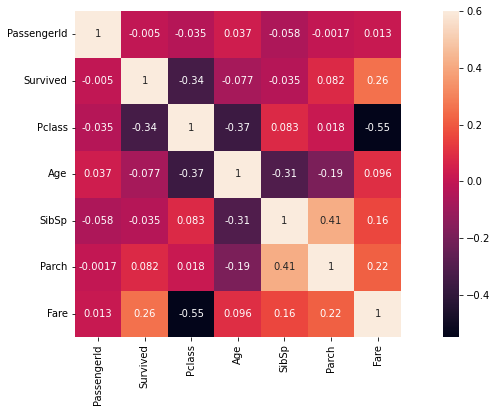

In [533]:
corr_matrix = titanic.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

<AxesSubplot:title={'center':'Count(Survived)'}>

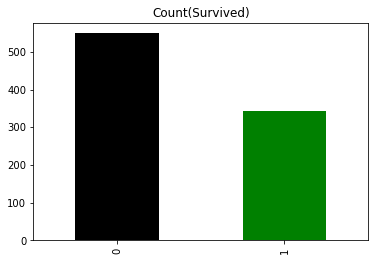

In [534]:
titanic.Survived.value_counts().plot(kind='bar', title='Count(Survived)', color = ['black', 'g'])

In [535]:
titanic.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

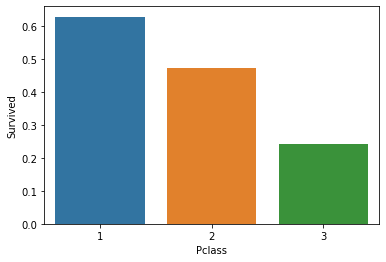

In [536]:
sns.barplot(x='Pclass', y='Survived', data=titanic, ci=None)

In [537]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

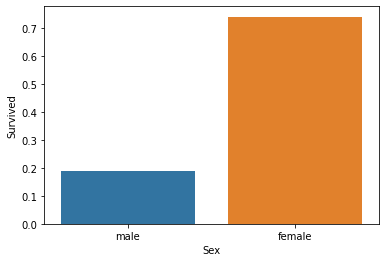

In [538]:
sns.barplot(x='Sex', y='Survived', data=titanic, ci=None)

In [539]:
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

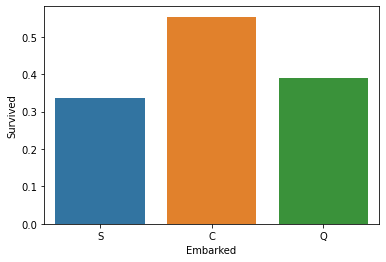

In [540]:
sns.barplot(x='Embarked', y='Survived', data=titanic, ci=None)

In [541]:
titanic.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [542]:
titanic[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

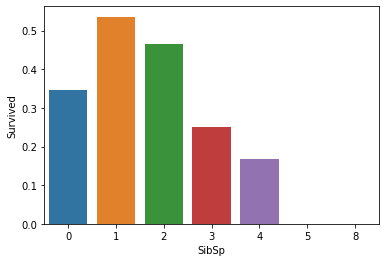

In [543]:
sns.barplot(x='SibSp', y='Survived', data=titanic, ci=None)

In [544]:
titanic.Age.max()

80.0

<AxesSubplot:xlabel='Age', ylabel='Count'>

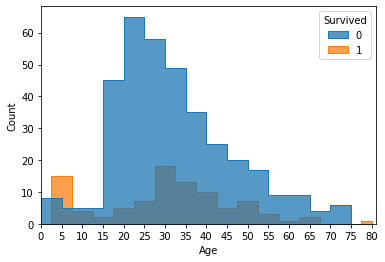

In [545]:
fig, ax = plt.subplots()
ax.set_xlim(0, 81)
ax.set_xticks(range(0,85,5))
sns.histplot(x=titanic[titanic.Sex == 'male'].Age.dropna(), hue=titanic.Survived, 
             data=titanic[titanic.Sex == 'male'].Age.dropna(), 
             element='step', multiple='dodge', bins=range(0, 85, 5))

<AxesSubplot:xlabel='Age', ylabel='Count'>

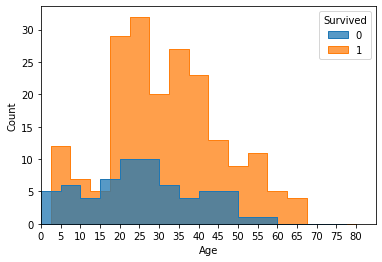

In [546]:
fig, ax = plt.subplots()
ax.set_xlim(0,85)
ax.set_xticks(range(0,85,5))
sns.histplot(x=titanic[titanic.Sex == 'female'].Age, hue=titanic.Survived, data=titanic[titanic.Sex == 'female'].Age.dropna(), 
             element='step', multiple='dodge', bins=range(0, 85, 5))

In [547]:
titanic.Embarked.mode()

0    S
dtype: object

## Необходимо избавиться от пропущенных значений

In [548]:
# Наибольшее количество пассажиров отправлялось из S. 
# Подставим в пропущенные значения S, используя моду колонки Embarked.
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace = True)

In [549]:
# Удаляю столбец Cabin, т.к. в нем более 70% пропущенных значений. 
titanic=titanic.drop(['Cabin'], axis=1)

In [550]:
titanic['status'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [551]:
titanic=titanic.rename(columns={'status':'Status'})

In [552]:
titanic['Status'] = titanic['Status'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
titanic['Status'] = titanic['Status'].replace('Mlle', 'Miss')
titanic['Status'] = titanic['Status'].replace('Ms', 'Miss')
titanic['Status'] = titanic['Status'].replace('Mme', 'Mrs')

In [553]:
titanic[['Status', 'Survived']].groupby(['Status'], as_index=False).mean()

,Status,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [554]:
status_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Other": 5}
titanic['Status'] = titanic['Status'].map(status_mapping)
titanic['Status'] = titanic['Status'].fillna(5)

In [555]:
group_age = titanic.groupby(['Sex', 'Pclass'])
group_age.Age.apply(lambda x: x.fillna(x.median()))
titanic.Age.fillna(titanic.Age.median, inplace = True)

In [556]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Status         0
dtype: int64

## Необходимо подготовить данные для обучения

In [557]:
# Приведем пол к 0 и 1
titanic['Sex'] = preprocessing.LabelEncoder().fit_transform(titanic['Sex'])

In [558]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1


In [559]:
titanic['Family_size'] = titanic.Parch + titanic.SibSp
titanic['Alone'] = titanic.Family_size == 0
titanic['Alone'] = preprocessing.LabelEncoder().fit_transform(titanic['Alone'])

In [560]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,4,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,3,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1,0,1


In [561]:
titanic.loc[titanic.Name.str.contains('Miss'), 'Age'] = 0
titanic.loc[titanic.Name.str.contains('Mr'), 'Age'] = 1
titanic.loc[titanic.Name.str.contains('Mrs'), 'Age'] = 0
titanic.loc[titanic.Name.str.contains('Master'), 'Age'] = 0
titanic.loc[titanic.Name.str.contains('Other'), 'Age'] = 1

In [562]:
titanic.loc[titanic.Pclass == 1, 'Pclass'] = 'First_class'
titanic.loc[titanic.Pclass == 2, 'Pclass'] = 'Second_class'
titanic.loc[titanic.Pclass == 3, 'Pclass'] = 'Third_class'
titanic = pd.concat((titanic, pd.get_dummies(titanic['Pclass'])), axis=1)
titanic = titanic.drop(['Pclass'], axis=1)

In [563]:
titanic = titanic.drop(['Name', 'Ticket', 'Embarked', 'PassengerId', 'Fare', 'Age'], axis=1)

In [564]:
titanic

,Survived,Sex,SibSp,Parch,Status,Family_size,Alone,First_class,Second_class,Third_class
0,0,1,1,0,1,1,0,0,0,1
1,1,0,1,0,3,1,0,1,0,0
2,1,0,0,0,4,0,1,0,0,1
3,1,0,1,0,3,1,0,1,0,0
4,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,5,0,1,0,1,0
887,1,0,0,0,4,0,1,1,0,0
888,0,0,1,2,4,3,0,0,0,1
889,1,1,0,0,1,0,1,1,0,0


## Прогнозирование

In [565]:
x = titanic[['Sex', 'SibSp', 'Parch', 'Status', 'Family_size', 'Alone', 'First_class', 'Second_class', 'Third_class']]
y = titanic['Survived']

In [566]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=13)

In [567]:
def try_model(model, X_train, y_train, X_test, y_test, model_params=None):
    if model_params is None:
        model_params = dict()
    pipeline = make_pipeline(StandardScaler(), model(**model_params))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, 
             color=np.random.rand(3,), 
             label=f"{model.__name__} ROC curve (area = {auc(fpr, tpr):0.3f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.legend()

    return pipeline, model.__name__, (acc, precision, recall, f1, roc_auc)

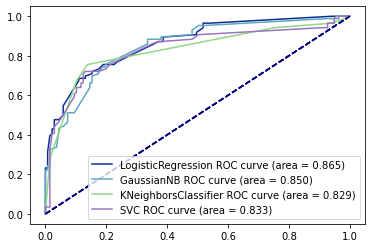

In [568]:
result = []
result.append(try_model(LogisticRegression, X_train, y_train, X_test, y_test))
result.append(try_model(GaussianNB, X_train, y_train, X_test, y_test))
result.append(try_model(KNeighborsClassifier, X_train, y_train, X_test, y_test))
result.append(try_model(SVC, X_train, y_train, X_test, y_test,
            model_params=dict(
            kernel='linear',
            probability=True,
)))


In [571]:
pd.DataFrame(data=[x[2] for x in result], columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC'],
                                          index=[x[1] for x in result]).sort_values(by='ROC AUC', ascending=False)

,Accuracy,Precision,Recall,F1 score,ROC AUC
KNeighborsClassifier,0.820628,0.773810,0.755814,0.764706,0.808564
LogisticRegression,0.789238,0.724138,0.732558,0.728324,0.778688
SVC,0.784753,0.720930,0.720930,0.720930,0.772874
GaussianNB,0.739910,0.616667,0.860465,0.718447,0.762349


## Результаты
Для оценки модели выбраны следующие метрики:
1) Accuracy - доля правильных ответов к общему количеству предсказаний;

2) Precision - доля истинных поположительных ответов ко всем положительным предсказаниям. Доля объектов, названных положительными и при этом действительно являющиeся положительными;

3) Recall - доля истинных поположительных ответов ко всем положительным вариантам (т.е. положительные ответы среди всех положительных, предсказанные верно);

4) F1 score - гармоническое среднее Precision и Recall;

5) ROC AUC - помогает понять соотношение между истинно положительными и ложно положительными результатами.

В моем случае по всем метрикам лучшей оказалась модель KNeighborsClassifier.